In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
books=pd.read_csv('bestsellers with categories.csv')

In [11]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [12]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [13]:
books.corr()

C:\Users\ovilO\AppData\Local\Temp\ipykernel_9836\4217152511.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  books.corr()


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


C:\Users\ovilO\AppData\Local\Temp\ipykernel_9836\296611798.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(books.corr(),annot=True)


<AxesSubplot: >

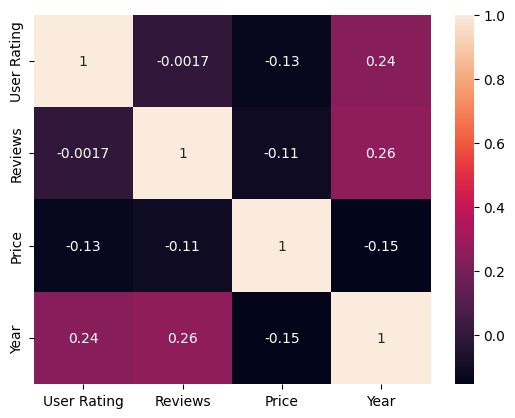

In [14]:
sns.heatmap(books.corr(),annot=True)

In [15]:
books['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [16]:
books['Author'].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

In [17]:
book_details=books[['Author','Reviews','Price','Year','Genre']]
Rating=books['User Rating']

In [18]:
LE=LabelEncoder()
LE.fit(book_details['Author'])
book_details['Author']=LE.transform(book_details['Author'])
LE.fit(book_details['Genre'])
book_details['Genre']=LE.transform(book_details['Genre'])
book_details.head()

C:\Users\ovilO\AppData\Local\Temp\ipykernel_9836\866429189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_details['Author']=LE.transform(book_details['Author'])
C:\Users\ovilO\AppData\Local\Temp\ipykernel_9836\866429189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_details['Genre']=LE.transform(book_details['Genre'])


,Author,Reviews,Price,Year,Genre
0,114,17350,8,2016,1
1,219,2052,22,2011,0
2,134,18979,15,2018,1
3,95,21424,6,2017,0
4,174,7665,12,2019,1


In [19]:
SCA=StandardScaler()
SCA.fit(book_details)
book_transformed=SCA.transform(book_details)
book_transformed=pd.DataFrame(book_transformed)
book_transformed.columns=book_details.columns

In [20]:
book_transformed.head()

,Author,Reviews,Price,Year,Genre
0,-0.217598,0.460453,-0.470810,0.632456,0.879883
1,1.274124,-0.844786,0.821609,-0.948683,-1.136515
2,0.066540,0.599440,0.175400,1.264911,0.879883
3,-0.487528,0.808050,-0.655441,0.948683,-1.136515
4,0.634815,-0.365880,-0.101547,1.581139,0.879883


In [21]:
Rating.head()

0    4.7
1    4.6
2    4.7
3    4.7
4    4.8
Name: User Rating, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(book_transformed, Rating, test_size=0.3)

In [23]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [24]:
Prediction=LR.predict(X_test)

In [25]:
np.sqrt(metrics.mean_squared_error(y_test,Prediction))

0.2023440018634886

In [26]:
LR.score(X_test,y_test)

0.08906414867787649